## Reading the data in

In [370]:
#importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [371]:
data = pd.read_csv('ipl.csv')

In [372]:
data.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

In [373]:
data.shape

(76014, 15)

In [374]:
data.dtypes

mid                 int64
date               object
venue              object
bat_team           object
bowl_team          object
batsman            object
bowler             object
runs                int64
wickets             int64
overs             float64
runs_last_5         int64
wickets_last_5      int64
striker             int64
non-striker         int64
total               int64
dtype: object

In [375]:
data.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [376]:
#Removing unwanted columns
col_remove = ['mid', 'striker', 'non-striker','batsman', 'bowler']
print('Before removing unwanted columns: {}'.format(data.shape))
data.drop(labels = col_remove, axis = 1, inplace = True)
print('After removing unwanted columns: {}'.format(data.shape))

Before removing unwanted columns: (76014, 15)
After removing unwanted columns: (76014, 10)


In [377]:
data.columns

Index(['date', 'venue', 'bat_team', 'bowl_team', 'runs', 'wickets', 'overs',
       'runs_last_5', 'wickets_last_5', 'total'],
      dtype='object')

In [378]:
data['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [379]:
data['bat_team'] = data['bat_team'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
data['bowl_team'] = data['bowl_team'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')

In [380]:
consistent_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians','Kings XI Punjab','Royal Challengers Bangalore', 'Delhi Daredevils','Sunrisers Hyderabad']

In [381]:
#keeping only consistent teams
print('Before removing inconsistent teams: {}'.format(data.shape))
data=data[(data['bat_team'].isin(consistent_teams)) & (data['bowl_team'].isin(consistent_teams))]
print('After removing inconsistent teams: {}'.format(data.shape))

Before removing inconsistent teams: (76014, 10)
After removing inconsistent teams: (62464, 10)


In [382]:
#Removing the first 5 overs data in every match
data = data[data['overs']>=5.0]

In [383]:
data['venue'].unique()

array(['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Eden Gardens', 'Sawai Mansingh Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'MA Chidambaram Stadium, Chepauk', 'Dr DY Patil Sports Academy',
       'Newlands', "St George's Park", 'Kingsmead', 'SuperSport Park',
       'Buffalo Park', 'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sheikh Zayed Stadium',
       'Sharjah Cricket Stadium', 'Dubai International Cricket Stadium',
       'Maharashtra Cricket Association St

In [384]:
Grounds = [ 'Wankhede Stadium', 'Sharjah Cricket Stadium', 'Sheikh Zayed Stadium', 'Sardar Patel Stadium, Motera', 'Rajiv Gandhi International Stadium, Uppal',
          'Punjab Cricket Association Stadium, Mohali', 'Punjab Cricket Association IS Bindra Stadium, Mohali', 'M Chinnaswamy Stadium'
          ,'MA Chidambaram Stadium, Chepauk', 'Eden Gardens', 'Dubai International Cricket Stadium','Saurashtra Cricket Association Stadium']

In [385]:
#keeping only consistent venues
print('Before removing inconsistent venues: {}'.format(data.shape))
data=data[(data['venue'].isin(Grounds))]
print('After removing inconsistent venues: {}'.format(data.shape))

Before removing inconsistent venues: (46560, 10)
After removing inconsistent venues: (28348, 10)


In [386]:
#Converting the column 'date' from string into datatime object
from datetime import datetime
print("Before converting date column from string to datetime object: {}".format(type(data.iloc[0,0])))
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')
print('After converting date column from string to datetime object: {}'.format(type(data.iloc[0,0])))

Before converting date column from string to datetime object: <class 'str'>
After converting date column from string to datetime object: <class 'pandas._libs.tslibs.timestamps.Timestamp'>


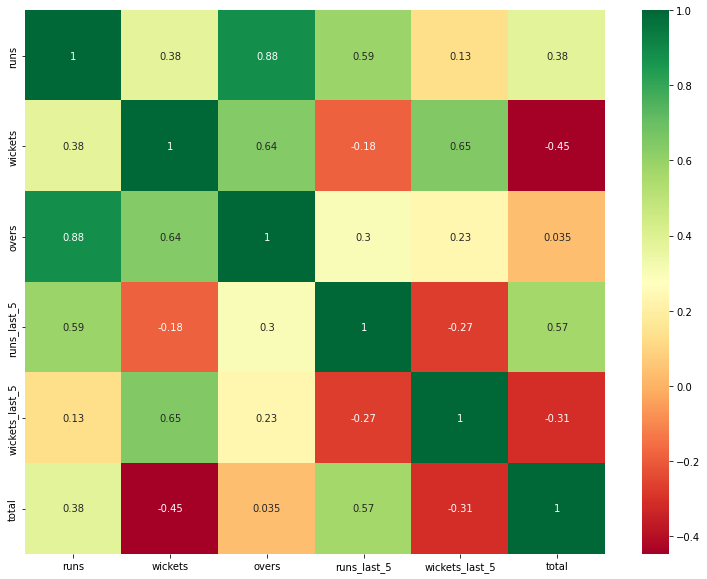

In [387]:
# Selecting correlated features using Heatmap
import matplotlib.pyplot as plt
import seaborn as sns

# Get correlation of all the features of the dataset
corr_matrix = data.corr()
top_corr_features = corr_matrix.index

# Plotting the heatmap
plt.figure(figsize=(13,10))
g = sns.heatmap(data=data[top_corr_features].corr(), annot=True, cmap='RdYlGn')

# Data Preprocessing

In [388]:
encode = pd.get_dummies(data=data, columns=['bat_team','bowl_team','venue'])
encode.columns

Index(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad',
       'venue_Dubai International Cricket Stadium', 'venue_Eden Gardens',
       'venue_M Chinnaswamy Stadium', 'venue_MA Chidambaram Stadium, Chepauk',
       'venue_Punjab Cricket Association IS Bindra Stadium, Mohali',
       'venue_Punjab Cricket Association Stadium, Mohali',
       'venue_Rajiv Gandhi International Stadium, Uppal',
   

In [389]:
data.head()

,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222


In [390]:
encode.tail()

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad,venue_Dubai International Cricket Stadium,venue_Eden Gardens,venue_M Chinnaswamy Stadium,"venue_MA Chidambaram Stadium, Chepauk","venue_Punjab Cricket Association IS Bindra Stadium, Mohali","venue_Punjab Cricket Association Stadium, Mohali","venue_Rajiv Gandhi International Stadium, Uppal","venue_Sardar Patel Stadium, Motera",venue_Sharjah Cricket Stadium,venue_Sheikh Zayed Stadium,venue_Wankhede Stadium
75884,2017-05-19,106,9,18.1,29,4,107,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
75885,2017-05-19,107,9,18.2,29,4,107,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
75886,2017-05-19,107,9,18.3,28,4,107,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
75887,2017-05-19,107,9,18.4,24,4,107,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
75888,2017-05-19,107,10,18.5,23,5,107,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [391]:
encode = encode[['date', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils', 'bat_team_Kings XI Punjab',
              'bat_team_Kolkata Knight Riders', 'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
              'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
              'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils', 'bowl_team_Kings XI Punjab',
              'bowl_team_Kolkata Knight Riders', 'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
              'bowl_team_Royal Challengers Bangalore', 'bowl_team_Sunrisers Hyderabad', 'venue_Dubai International Cricket Stadium', 'venue_Eden Gardens','venue_M Chinnaswamy Stadium', 'venue_MA Chidambaram Stadium, Chepauk',
              'venue_Punjab Cricket Association IS Bindra Stadium, Mohali','venue_Punjab Cricket Association Stadium, Mohali','venue_Rajiv Gandhi International Stadium, Uppal','venue_Sardar Patel Stadium, Motera', 'venue_Sharjah Cricket Stadium', 
              'venue_Wankhede Stadium',
              'overs', 'runs', 'wickets', 'runs_last_5', 'wickets_last_5', 'total']]

In [392]:
encode.head(20)

,date,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad,venue_Dubai International Cricket Stadium,venue_Eden Gardens,venue_M Chinnaswamy Stadium,"venue_MA Chidambaram Stadium, Chepauk","venue_Punjab Cricket Association IS Bindra Stadium, Mohali","venue_Punjab Cricket Association Stadium, Mohali","venue_Rajiv Gandhi International Stadium, Uppal","venue_Sardar Patel Stadium, Motera",venue_Sharjah Cricket Stadium,venue_Wankhede Stadium,overs,runs,wickets,runs_last_5,wickets_last_5,total
32,2008-04-18,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,5.1,61,0,59,0,222
33,2008-04-18,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,5.2,61,1,59,1,222
34,2008-04-18,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,5.3,61,1,59,1,222
35,2008-04-18,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,5.4,61,1,59,1,222
36,2008-04-18,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,5.5,61,1,58,1,222
37,2008-04-18,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,5.6,61,1,58,1,222
38,2008-04-18,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,6.1,62,1,55,1,222
39,2008-04-18,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,6.2,63,1,52,1,222
40,2008-04-18,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,6.3,64,1,47,1,222
41,2008-04-18,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,6.4,66,1,45,1,222


In [394]:
x = encode.iloc[:,:-1]
y = encode.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)
print("Training set: {} and Test set: {}".format(X_train.shape, X_test.shape))

Training set: (22678, 32) and Test set: (5670, 32)


In [395]:
# Removing the 'date' column
X_train.drop(labels='date', axis=True, inplace=True)
X_test.drop(labels='date', axis=True, inplace=True)

# Linear Regression (approx 67%)

In [396]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

LinearRegression()

In [397]:
y_pred_lr = linear_regressor.predict(X_test)

In [398]:
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
print("---- Linear Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_lr)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_lr)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_lr))))
#print(cross_val_score(linear_regressor, x, y, cv=10, scoring="r2").mean())
print("R2 score : %.2f" % r2_score(y_test,y_pred_lr))

---- Linear Regression - Model Evaluation ----
Mean Absolute Error (MAE): 12.772292891406469
Mean Squared Error (MSE): 284.3841459020146
Root Mean Squared Error (RMSE): 16.86369312760448
R2 score : 0.66


# Logistic Regression (approx 72%)

In [424]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
logistic_regressor = LogisticRegression(solver='liblinear')
logistic_regressor.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [425]:
y_pred_lgr = logistic_regressor.predict(X_test)
#print(classification_report(y_test, y_pred_lgr))

In [426]:
print("---- Logistic Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_lgr)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_lgr)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_lgr))))
print("R2 score : %.2f" % r2_score(y_test,y_pred_lgr))

---- Logistic Regression - Model Evaluation ----
Mean Absolute Error (MAE): 7.007231040564374
Mean Squared Error (MSE): 233.5194003527337
Root Mean Squared Error (RMSE): 15.281341575684175
R2 score : 0.72


# Decision Tree (approx 91%)

In [454]:
from sklearn.tree import DecisionTreeRegressor
decision_regressor = DecisionTreeRegressor(min_samples_leaf=.000001)
decision_regressor.fit(X_train,y_train)

DecisionTreeRegressor(min_samples_leaf=1e-06)

In [455]:
y_pred_dt = decision_regressor.predict(X_test)

In [456]:
print("---- Decision Tree Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_dt)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_dt)))
print("Root Mean Squared Error(RMSE): {}".format(np.sqrt(mse(y_test, y_pred_dt))))
print("R2 score : %.2f" % r2_score(y_test,y_pred_dt))

---- Decision Tree Regression - Model Evaluation ----
Mean Absolute Error (MAE): 2.477689594356261
Mean Squared Error (MSE): 72.41891534391534
Root Mean Squared Error(RMSE): 8.509930395950095
R2 score : 0.91


# Random Forest (96%)

In [463]:
from sklearn.ensemble import RandomForestRegressor
random_regressor = RandomForestRegressor()
random_regressor.fit(X_train, y_train)

RandomForestRegressor()

In [464]:
y_pred_rf = random_regressor.predict(X_test)

In [465]:
# Random Forest Regression - Model Evaluation
print("---- Random Forest Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_rf)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_rf)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_rf))))
print("R2 score : %.2f" % r2_score(y_test,y_pred_rf))

---- Random Forest Regression - Model Evaluation ----
Mean Absolute Error (MAE): 3.1169029982363314
Mean Squared Error (MSE): 30.564647636801872
Root Mean Squared Error (RMSE): 5.528530332448387
R2 score : 0.96


# Gradient Boosting Regressor (92%)

In [466]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import  ExtraTreesRegressor
import xgboost
from xgboost import XGBRegressor

In [474]:
gbr=GradientBoostingRegressor(n_estimators=10000)
gbr.fit(X_train,y_train)
y_pred_gbr = gbr.predict(X_test)

In [475]:
# Gradient Boosting Regression - Model Evaluation
print("---- Gradient Boosting Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_gbr)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_gbr)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_gbr))))
print("R2 score : %.2f" % r2_score(y_test,y_pred_gbr))

---- Gradient Boosting Regression - Model Evaluation ----
Mean Absolute Error (MAE): 5.784557751903433
Mean Squared Error (MSE): 71.17883229145095
Root Mean Squared Error (RMSE): 8.436754843626247
R2 score : 0.92


# Extra Trees Regressor (98%)

In [580]:
etr=ExtraTreesRegressor(n_estimators=1000)
etr.fit(X_train,y_train)
y_pred_etr = etr.predict(X_test)

In [581]:
# Extra Trees Regression - Model Evaluation
print("---- Extra Trees Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_etr)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_etr)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_etr))))
print("R2 score : %.2f" % r2_score(y_test,y_pred_etr))

---- Extra Trees Regression - Model Evaluation ----
Mean Absolute Error (MAE): 1.4221772486772484
Mean Squared Error (MSE): 14.57136508738977
Root Mean Squared Error (RMSE): 3.8172457462665106
R2 score : 0.98


## XGB Regressor

In [582]:
import xgboost
from xgboost import XGBRegressor

In [585]:
xgbr=XGBRegressor(n_estimators=10000)
xgbr.fit(X_train,y_train)
y_pred_xgbr = xgbr.predict(X_test)

[19:53:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [586]:
# XGBoost Regression - Model Evaluation
print("---- XGBoost Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_xgbr)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_xgbr)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_xgbr))))
print("R2 score : %.2f" % r2_score(y_test,y_pred_xgbr))

---- XGBoost Regression - Model Evaluation ----
Mean Absolute Error (MAE): 5.823619909135122
Mean Squared Error (MSE): 71.0690905155132
Root Mean Squared Error (RMSE): 8.430248544112635
R2 score : 0.92


# Predictions input

In [634]:
def predict_score(batting_team='Chennai Super Kings', bowling_team='Mumbai Indians', venue = 'Wankhede Stadium', overs=5.1, runs=50, wickets=0, runs_in_prev_5=50, wickets_in_prev_5=0):
  temp_array = list()

  # Batting Team
  if batting_team == 'Chennai Super Kings':
    temp_array = temp_array + [1,0,0,0,0,0,0,0]
  elif batting_team == 'Delhi Daredevils':
    temp_array = temp_array + [0,1,0,0,0,0,0,0]
  elif batting_team == 'Kings XI Punjab':
    temp_array = temp_array + [0,0,1,0,0,0,0,0]
  elif batting_team == 'Kolkata Knight Riders':
    temp_array = temp_array + [0,0,0,1,0,0,0,0]
  elif batting_team == 'Mumbai Indians':
    temp_array = temp_array + [0,0,0,0,1,0,0,0]
  elif batting_team == 'Rajasthan Royals':
    temp_array = temp_array + [0,0,0,0,0,1,0,0]
  elif batting_team == 'Royal Challengers Bangalore':
    temp_array = temp_array + [0,0,0,0,0,0,1,0]
  elif batting_team == 'Sunrisers Hyderabad':
    temp_array = temp_array + [0,0,0,0,0,0,0,1]

  # Bowling Team
  if bowling_team == 'Chennai Super Kings':
    temp_array = temp_array + [1,0,0,0,0,0,0,0]
  elif bowling_team == 'Delhi Daredevils':
    temp_array = temp_array + [0,1,0,0,0,0,0,0]
  elif bowling_team == 'Kings XI Punjab':
    temp_array = temp_array + [0,0,1,0,0,0,0,0]
  elif bowling_team == 'Kolkata Knight Riders':
    temp_array = temp_array + [0,0,0,1,0,0,0,0]
  elif bowling_team == 'Mumbai Indians':
    temp_array = temp_array + [0,0,0,0,1,0,0,0]
  elif bowling_team == 'Rajasthan Royals':
    temp_array = temp_array + [0,0,0,0,0,1,0,0]
  elif bowling_team == 'Royal Challengers Bangalore':
    temp_array = temp_array + [0,0,0,0,0,0,1,0]
  elif bowling_team == 'Sunrisers Hyderabad':
    temp_array = temp_array + [0,0,0,0,0,0,0,1]
    
  #venue
  if venue == 'Dubai International Cricket Stadium':
    temp_array = temp_array + [1,0,0,0,0,0,0,0,0,0]
  elif venue == 'Eden Gardens':
    temp_array = temp_array + [0,1,0,0,0,0,0,0,0,0]
  elif venue == 'M Chinnaswamy Stadium':
    temp_array = temp_array + [0,0,1,0,0,0,0,0,0,0]
  elif venue == 'MA Chidambaram Stadium, Chepauk':
    temp_array = temp_array + [0,0,0,1,0,0,0,0,0,0]
  elif venue == 'Punjab Cricket Association IS Bindra Stadium, Mohali':
    temp_array = temp_array + [0,0,0,0,1,0,0,0,0,0]
  elif venue == 'Punjab Cricket Association Stadium, Mohali':
    temp_array = temp_array + [0,0,0,0,0,1,0,0,0,0]
  elif venue == 'Rajiv Gandhi International Stadium, Uppal':
    temp_array = temp_array + [0,0,0,0,0,0,1,0,0,0]
  elif venue == 'Sardar Patel Stadium, Motera':
    temp_array = temp_array + [0,0,0,0,0,0,0,1,0,0]
  elif venue == 'Sharjah Cricket Stadium':
    temp_array = temp_array + [0,0,0,0,0,0,0,0,1,0]
  elif venue == 'Wankhede Stadium':
    temp_array = temp_array + [0,0,0,0,0,0,0,0,0,1]

  # Overs, Runs, Wickets, Runs_in_prev_5, Wickets_in_prev_5
  temp_array = temp_array + [overs, runs, wickets, runs_in_prev_5, wickets_in_prev_5]

  # Converting into numpy array
  temp_array = np.array([temp_array])

  # Prediction
  return int(etr.predict(temp_array)[0])



# Prediction 1

In [635]:
final_score = predict_score(batting_team='Kolkata Knight Riders', bowling_team='Delhi Daredevils', venue='Eden Gardens', overs=17.2, runs=111, wickets=4, runs_in_prev_5=26, wickets_in_prev_5=2)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"


The final predicted score (range): 123 to 138


In [636]:
final_score = predict_score(batting_team='Royal Challengers Bangalore', bowling_team='Kolkata Knight Riders', venue='M Chinnaswamy Stadium', overs=15, runs=142, wickets=1, runs_in_prev_5=64, wickets_in_prev_5=0)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))

The final predicted score (range): 181 to 196


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"


In [637]:
final_score = predict_score(batting_team='Mumbai Indians', bowling_team='Chennai Super Kings', venue='Rajiv Gandhi International Stadium, Uppal', overs=10, runs=70, wickets=2, runs_in_prev_5=25, wickets_in_prev_5=1)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))

The final predicted score (range): 140 to 155


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  "X does not have valid feature names, but"


In [79]:
import pickle
filename = 'first-innings-score-lr-model.pkl'
pickle.dump(linear_regressor, open(filename, 'wb'))